In [1]:
from ltlcross_wrapper import ResAnalyzer, gather_cumulative, gather_mins

In [2]:
sd_benchmarks = {}
for name in ["literature_sd","literature_det","random_sd","random_det"]:
    b = ResAnalyzer(f"data/{name}.csv", cols=["states","time","acc","transitions"])
    sd_benchmarks[name] = b
    b.compute_best(["yes.owl#s","yes.owl#a"],"yes.owl#best")
    b.compute_best(["no.owl#s","no.owl#a"],"no.owl#best")

In [3]:
tool_set = ["yes.seminator#def","yes.owl#best", "no.owl#best"]

For each benchmark, we list the cumulative numbers of states for each tool. `yes` in the name of tools means that the Spot simplifications were applied on the results of the tools (were not disabled for `seminator`). `best` means that we choose the best variant for Owl, `#def` is the default setting of Seminator 2. If you want to see numbers where Spot's simplifications were not run for Owl, or the numbers without the _best-for-Owl_ approach, set tool_set to `None`. If you do, the `#a` stands for `ltl2ldgba -a` and analogously for `#s`.

In [4]:
gather_cumulative(sd_benchmarks, tool_set=tool_set)

,literature_sd,literature_det,random_sd,random_det
tool,,,,
no.owl#best,306,786,3497,2809
yes.owl#best,272,706,3005,2496
yes.seminator#def,207,580,2562,2352


### Minimal automata

The following table shows for how many formulas each tool produces automaton that has the smallest number of states. The minimum ranges over the considered tools. The number in min hits shows how many times the same size as the smallest automaton was achieved. The number in unique min hits counts only cases where the given tool is the only tool with such a small automaton.

In [5]:
gather_mins(sd_benchmarks, tool_set=tool_set)

### Running times and timeouts
The `#a` variant of Owl reached the 30s timeout in one case for random formulae. Otherwise, most of the execution times were below 1s for all tools.

In [6]:
for name, b in sd_benchmarks.items():
    print(name)
    display(b.get_error_counts())
    display(b.values.time.max())

literature_sd


,timeout,parse error,incorrect,crash,no output
no.owl#a,1,0,0,0,0
yes.owl#a,1,0,0,0,0


tool
min(count)            0.024436
no.owl#a             30.000300
no.owl#best           0.678572
no.owl#s              0.678572
yes.owl#a            30.000500
yes.owl#best          1.001680
yes.owl#s             1.001680
yes.seminator#def     0.050658
dtype: float64

literature_det


,timeout,parse error,incorrect,crash,no output
tool,,,,,


tool
min(count)           0.079935
no.owl#a             5.304140
no.owl#best          0.122306
no.owl#s             0.466509
yes.owl#a            6.251420
yes.owl#best         1.115670
yes.owl#s            1.548140
yes.seminator#def    0.079935
dtype: float64

random_sd


,timeout,parse error,incorrect,crash,no output
tool,,,,,


tool
min(count)           0.076190
no.owl#a             0.172506
no.owl#best          0.115520
no.owl#s             0.138701
yes.owl#a            0.223552
yes.owl#best         0.153325
yes.owl#s            0.153325
yes.seminator#def    0.076190
dtype: float64

random_det


,timeout,parse error,incorrect,crash,no output
tool,,,,,


tool
min(count)           0.030787
no.owl#a             0.030787
no.owl#best          0.030787
no.owl#s             0.045156
yes.owl#a            0.074332
yes.owl#best         0.073500
yes.owl#s            0.073500
yes.seminator#def    0.040133
dtype: float64

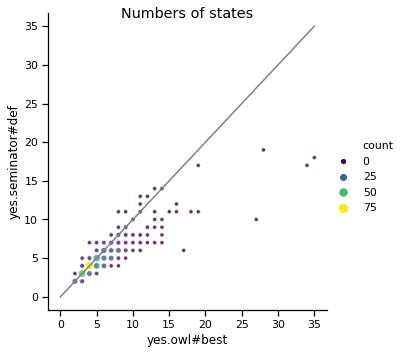

In [7]:
b = sd_benchmarks["random_sd"]
b.seaborn_scatter_plot("yes.owl#best","yes.seminator#def", include_equal=True)

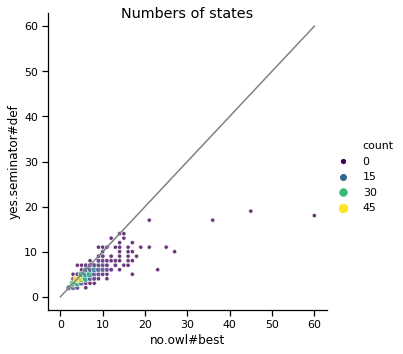

In [8]:
b = sd_benchmarks["random_sd"]
b.seaborn_scatter_plot("no.owl#best","yes.seminator#def", include_equal=True)

### Cross-comparison
The cross-comparison for a benchmark shows, in a cell (`row`,`column`) in how many cases the tool in `row` produces automaton that is better thatn the one produced by `column`. The last columns (`V`) summs the numbers across rows, while the green highlighting fill a space that is proportional to how well the tool in `row` competed agains `column` (proportional across columns).

In [9]:
for n, b in sd_benchmarks.items():
    print(n)
    display(b.cross_compare(tool_set=tool_set))

literature_sd


,yes.seminator#def,yes.owl#best,no.owl#best,V
yes.seminator#def,nan,32,40,72
yes.owl#best,2,nan,38,40
no.owl#best,2,0,nan,2


literature_det


,yes.seminator#def,yes.owl#best,no.owl#best,V
yes.seminator#def,nan,32,66,98
yes.owl#best,0,nan,66,66
no.owl#best,0,0,nan,0


random_sd


,yes.seminator#def,yes.owl#best,no.owl#best,V
yes.seminator#def,nan,250,402,652
yes.owl#best,135,nan,423,558
no.owl#best,67,0,nan,67


random_det


,yes.seminator#def,yes.owl#best,no.owl#best,V
yes.seminator#def,nan,53,202,255
yes.owl#best,4,nan,200,204
no.owl#best,0,0,nan,0


# Merged results
We now merge the random results from the 2 categories into 1

In [10]:
!cp data/random_det.csv data/random_sd_merged.csv
!tail -n +2 data/random_sd.csv >> data/random_sd_merged.csv
!wc data/random_sd_merged.csv
!cp data/literature_det.csv data/literature_sd_merged.csv
!tail -n +2 data/literature_sd.csv >> data/literature_sd_merged.csv
!wc data/literature_sd_merged.csv

   5001  413406 2438134 data/random_sd_merged.csv
  1006 120606 730448 data/literature_sd_merged.csv


In [11]:
m_benchmarks = {}
for name in ["literature_sd_merged","random_sd_merged"]:
    b = ResAnalyzer(f"data/{name}.csv", cols=["states","time","acc","transitions"])
    m_benchmarks[name] = b
    b.compute_best(["yes.owl#s","yes.owl#a"],"yes.owl#best")
    b.compute_best(["no.owl#s","no.owl#a"],"no.owl#best")

In [12]:
gather_cumulative(m_benchmarks)

,literature_sd_merged,random_sd_merged
tool,,
no.owl#a,1417,7090
no.owl#s,1330,6398
yes.owl#a,1032,5672
yes.owl#s,1043,5588
yes.seminator#def,770,4914


In [13]:
gather_mins(m_benchmarks, tool_set=tool_set)

In [14]:
b = m_benchmarks["random_sd_merged"]

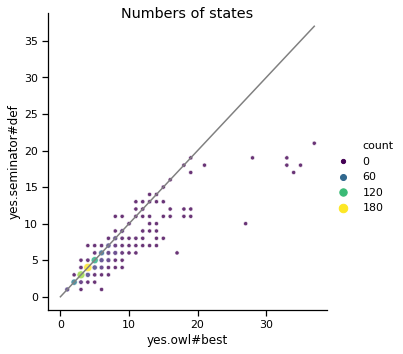

In [15]:
b.seaborn_scatter_plot("yes.owl#best","yes.seminator#def", include_equal=True)

In [16]:
b.cross_compare(tool_set)

,yes.seminator#def,yes.owl#best,no.owl#best,V
yes.seminator#def,nan,303,604,907
yes.owl#best,139,nan,623,762
no.owl#best,67,0,nan,67
